In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
import json
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, Embedding

# from kerastuner.tuners import RandomSearch

In [14]:
data_directory = r"D:\Courses\0\1 Programming\New Music-Generation-using-deep-learning-main\data/"
# D:\Courses\0\1 Programming\Music-Generation-using-deep-learning-main
# data_file = r"i/content/drive/MyDrive/Music-Generation-using-deep-learning-main/input.txt"
data_file = r"input.txt"
charIndex_json = "char_to_idx.json"
# model_weights_directory = r'/content/drive/MyDrive/Music-Generation-using-deep-learning-main/model/'
model_weights_directory = r'D:\Courses\0\1 Programming\New Music-Generation-using-deep-learning-main\model/'
BATCH_SIZE = 16
SEQ_LENGTH = 64

In [15]:
def make_model(unique_chars):
    model = Sequential()
    
    model.add(Embedding(input_dim = unique_chars, output_dim = 512, batch_input_shape = (1, 1))) 
  
    model.add(LSTM(256, return_sequences = True, stateful = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256, return_sequences = True, stateful = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(256, stateful = True)) 
    #remember, that here we haven't given return_sequences = True because here we will give only one character to generate the
    #sequence. In the end, we just have to get one output which is equivalent to getting output at the last time-stamp. So, here
    #in last layer there is no need of giving return sequences = True.
    model.add(Dropout(0.2))
    
    model.add((Dense(unique_chars)))
    model.add(Activation("softmax"))
    
    return model

In [16]:
def generate_sequence(epoch_num, initial_index, seq_length):
    with open(os.path.join(data_directory, charIndex_json)) as f:
        char_to_index = json.load(f)
    index_to_char = {i:ch for ch, i in char_to_index.items()}
    unique_chars = len(index_to_char)
    
    model = make_model(unique_chars)
    model.load_weights(model_weights_directory + "weights.{}.h5".format(epoch_num))
     
    sequence_index = [initial_index]
    
    probability_matrix = []
    for _ in range(seq_length):
        batch = np.zeros((1, 1))
        batch[0, 0] = sequence_index[-1]
        
        predicted_probs = model.predict_on_batch(batch).ravel()
        
        probability_matrix.append(predicted_probs)

        sample = np.random.choice(range(unique_chars), size = 1, p = predicted_probs)
#      
#       sample = np.argsort(predicted_probs)[::-1]
        #print(sample)
        sequence_index.append(sample[0])
    
    seq = ''.join(index_to_char[c] for c in sequence_index)
    
    cnt = 0
    for i in seq:
        cnt += 1
        if i == "\n":
            break
    seq1 = seq[cnt:]
    #above code is for ignoring the starting string of a generated sequence. This is because we are passing any arbitrary 
    #character to the model for generating music. Now, the model start generating sequence from that character itself which we 
    #have passed, so first few characters before "\n" contains meaningless word. Model start generating the music rhythm from
    #next line onwards. The correct sequence it start generating from next line onwards which we are considering.
    
    cnt = 0
    for i in seq1:
        cnt += 1
        if i == "\n" and seq1[cnt] == "\n":
            break
    seq2 = seq1[:cnt]
    #Now our data contains three newline characters after every tune. So, the model has leart that too. So, above code is used for
    #ignoring all the characters that model has generated after three new line characters. So, here we are considering only one
    #tune of music at a time and finally we are returning it..
    
    return seq2,probability_matrix, seq

In [17]:
ep = int(input("1. Enter the epoch number of the model you want to load. Small number will generate more errors in music: "))
ar = int(input("\n2. Enter any number between 0 to 86 which will be given as initial charcter to model for generating sequence: "))
ln = int(input("\n3. Enter the length of music sequence you want to generate. Typical number is between 300-600. Too small number will generate hardly generate any sequence: "))

music,probability_matrix,originalSequence = generate_sequence(ep, ar, ln)

print("\nMUSIC SEQUENCE GENERATED: \n")

print(originalSequence)
print('\n\n\nFinal Output')
print(music)

1. Enter the epoch number of the model you want to load. Small number will generate more errors in music: 9

2. Enter any number between 0 to 86 which will be given as initial charcter to model for generating sequence: 76

3. Enter the length of music sequence you want to generate. Typical number is between 300-600. Too small number will generate hardly generate any sequence: 590

MUSIC SEQUENCE GENERATED: 

qw Arpan ol
\:  arrnsv sot 
EBGoncntor
S:Lrwo soo In3ka osaneleil.ol)n 4Iicrttels
M: /8=61
K:G
GG|
ADD2E|
"E7"A2A G2 E|
F2  | "D"fLf gfg|| "G7"a2f2 fed ~["Em"g8d "D"B> B "C"d2 dB:|
B2 d de|"A7"B c2|"D"GG2| 
 "D7"GdA "_EF.G| z\"G7"Aa/ "Fm"age | "B7"GAB "Em"AAG FFG G2 EB B2|
"A"G BG|"B"A) dc |  ("Dm"B2 A | "A""D"G> A>c f2f | cBB EA "GD]"D E|"D3EB "Dm"e2 |4eded A2 A B2 | "G"A B fB|""E"B2 E/A/ E|"Am"A2c |zA G G2z|"G"G/d/f/c/|"D"c2e2 |"Gm"BGG .Ge2| "Bm\ e2 c B2||
"Dm"B/c/d/d|"Cm"d4 |
"D"d2 g2e | "A"B4d "D"B d | "A"E4c2:|
|
|: "fG>B E2| "G"e2<2:| "A"c2d|
"A2ge "A7"g-]|d(e}{fefB|"F7"c2,  

# **Section: Music Player 🎵** 

In [18]:
m = music.split('L:')
#default value of node length, L must be given
if (len(m) == 1):
    m.insert(0,'L:1/8')
    #print(m)
    #print(''.join(m))
    music = '\n'.join(m)
    f = open('music.abc', 'w')
    f.write(music)
    f.close()
    print(music)
else:
  print("Parameter Sufficinet\n" + music)

print('Musical Player here\n')

# from music21 import converter
# s = converter.parse('music.abc')
# s.show('midi')  # or s.write('midi', fp='output.mid')

try:
  print('Musical Player here\n')
  from music21 import converter
  s = converter.parse('./music.abc')
  s.show('midi')  # or s.write('midi', fp='output.mid')
except:
  print('Retry')

L:1/8
\:  arrnsv sot 
EBGoncntor
S:Lrwo soo In3ka osaneleil.ol)n 4Iicrttels
M: /8=61
K:G
GG|
ADD2E|
"E7"A2A G2 E|
F2  | "D"fLf gfg|| "G7"a2f2 fed ~["Em"g8d "D"B> B "C"d2 dB:|
B2 d de|"A7"B c2|"D"GG2| 
 "D7"GdA "_EF.G| z\"G7"Aa/ "Fm"age | "B7"GAB "Em"AAG FFG G2 EB B2|
"A"G BG|"B"A) dc |  ("Dm"B2 A | "A""D"G> A>c f2f | cBB EA "GD]"D E|"D3EB "Dm"e2 |4eded A2 A B2 | "G"A B fB|""E"B2 E/A/ E|"Am"A2c |zA G G2z|"G"G/d/f/c/|"D"c2e2 |"Gm"BGG .Ge2| "Bm\ e2 c B2||
"Dm"B/c/d/d|"Cm"d4 |
"D"d2 g2e | "A"B4d "D"B d | "A"E4c2:|
|
|: "fG>B E2| "G"e2<2:| "A"c2d|
"A2ge "A7"g-]|d(e}{fefB|"F7"c2,  "A"
Musical Player here

Musical Player here

Retry


In [16]:
a = '''
X: 1
T: Cooley's
M: 4/4
R: reel
K: Emin
|:D2|EB{c}BA B2 EB|~B2 AB dBAG|FDAD BDAD|FDAD dAFD|
eB B2 eBgB|eB B2 defg|afe^c dBAF|DEFD E2:|
'''

f = open('music.abc', 'w')
f.write(a)
f.close()
print(type(a))
print(a)


<class 'str'>

X: 1
T: Cooley's
M: 4/4
R: reel
K: Emin
|:D2|EB{c}BA B2 EB|~B2 AB dBAG|FDAD BDAD|FDAD dAFD|
eB B2 eBgB|eB B2 defg|afe^c dBAF|DEFD E2:|



In [17]:
m = a.split('L:')
#default value of node length, L must be given
if (len(m) == 1):
    m.insert(0,'L:1/8')
    #print(m)
    #print(''.join(m))
    a = ''.join(m)
    f = open('music.abc', 'w')
    f.write(a)
    f.close()
print(a)

L:1/8
X: 1
T: Cooley's
M: 4/4
R: reel
K: Emin
|:D2|EB{c}BA B2 EB|~B2 AB dBAG|FDAD BDAD|FDAD dAFD|
eB B2 eBgB|eB B2 defg|afe^c dBAF|DEFD E2:|



In [19]:
from music21 import converter
s = converter.parse('music.abc')
s.show('midi')  # or s.write('midi', fp='output.mid')

# **Section: Next Character Probability Chart 📊** 



In [14]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [33]:
x_axis_data = []
y_axis_data = []
for i in range(20):

  #print(probability_matrix[i])
  probability_array = probability_matrix[i]
  
  k1 = np.argsort(probability_array)[::-1]
  probability_array.sort()

  #print(k1)
  characterNumeral = list(k1[::6])
  topProbability = list(probability_array[::-1][::6])
  
  characterArray = []
  character = ' '.join(str(e) for e in characterNumeral)
  characterArray= character.split(' ')
  x_axis_data.append(characterArray)
  y_axis_data.append(topProbability)


  print(characterArray)
  print('\n')
  print(topProbability)
  print('\n')



['61', '63', '57', '7', '5', '50', '45', '66', '53', '2', '36', '69', '27', '48', '19']


[0.5294873, 0.015919514, 0.0015335716, 0.00049282314, 0.00028920398, 0.00021466486, 0.000116755065, 9.349237e-05, 6.342865e-05, 4.56737e-05, 3.8883463e-05, 2.2495955e-05, 1.6783037e-05, 9.372104e-06, 4.3255422e-06]


['85', '9', '7', '31', '26', '27', '6', '29', '75', '44', '73', '51', '24', '53', '76']


[0.8964417, 0.00030841923, 3.7412574e-05, 1.2597966e-05, 8.504041e-06, 5.4326138e-06, 3.3522228e-06, 2.60478e-06, 1.5517375e-06, 9.892835e-07, 6.260373e-07, 3.6917362e-07, 1.5965055e-07, 9.0061675e-08, 3.866905e-08]


['3', '62', '47', '23', '11', '72', '28', '71', '36', '13', '76', '49', '10', '79', '75']


[0.98913646, 0.0008219046, 0.00013229407, 1.8171699e-05, 1.22756455e-05, 6.187942e-06, 4.962724e-06, 3.4337772e-06, 2.3648063e-06, 9.5817e-07, 6.742217e-07, 3.6522107e-07, 1.4218027e-07, 8.7328644e-08, 3.7254498e-08]


['32', '29', '84', '41', '65', '55', '26', '37', '20', '70', '45', '74', '

In [17]:
dct = {"\n": 0, " ": 1, "!": 2, "\"": 3, "#": 4, "%": 5, "&": 6, "'": 7, "(": 8, ")": 9, "+": 10, ",": 11, "-": 12, ".": 13, "/": 14, "0": 15, "1": 16, "2": 17, "3": 18, "4": 19, "5": 20, "6": 21, "7": 22, "8": 23, "9": 24, ":": 25, "=": 26, ">": 27, "?": 28, "A": 29, "B": 30, "C": 31, "D": 32, "E": 33, "F": 34, "G": 35, "H": 36, "I": 37, "J": 38, "K": 39, "L": 40, "M": 41, "N": 42, "O": 43, "P": 44, "Q": 45, "R": 46, "S": 47, "T": 48, "U": 49, "V": 50, "W": 51, "X": 52, "Y": 53, "[": 54, "\\": 55, "]": 56, "^": 57, "_": 58, "a": 59, "b": 60, "c": 61, "d": 62, "e": 63, "f": 64, "g": 65, "h": 66, "i": 67, "j": 68, "k": 69, "l": 70, "m": 71, "n": 72, "o": 73, "p": 74, "q": 75, "r": 76, "s": 77, "t": 78, "u": 79, "v": 80, "w": 81, "x": 82, "y": 83, "z": 84, "|": 85, "~": 86}


In [34]:
def get_key(val):
    for key, value in dct.items():
         if val == value:
             return key
 
    return "key doesn't exist"
 
# get_key(23)
counter = 0
for j in x_axis_data:
  arr = []
  count = 0
  for i in j:
    #print(i, j)

    arr.append(get_key(int(i)))
    # print(get_key(int(i)))

  x_axis_data[counter] = arr
  count+=1
  counter+=1



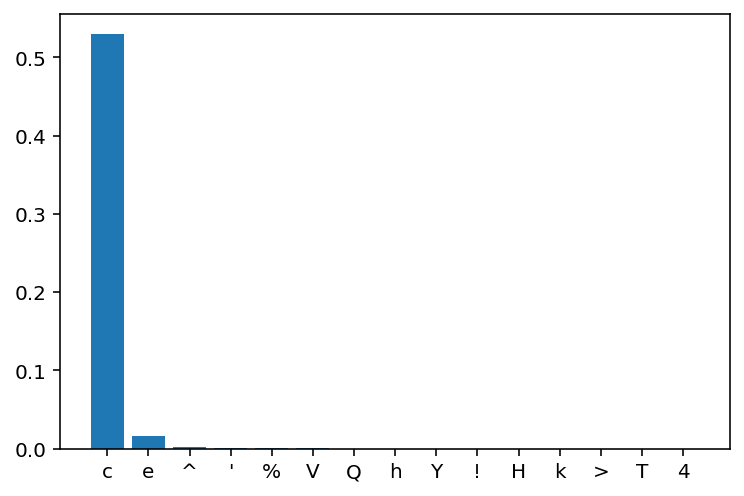

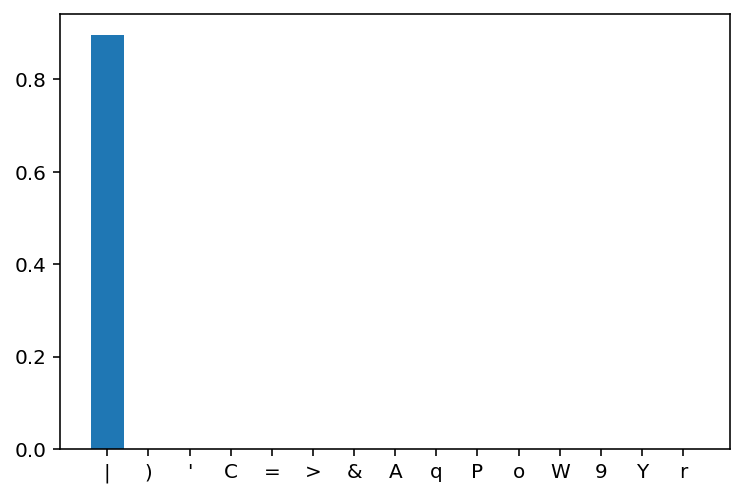

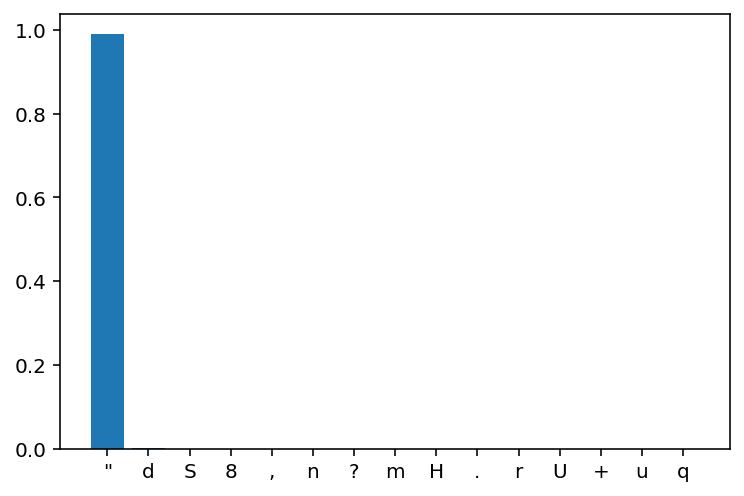

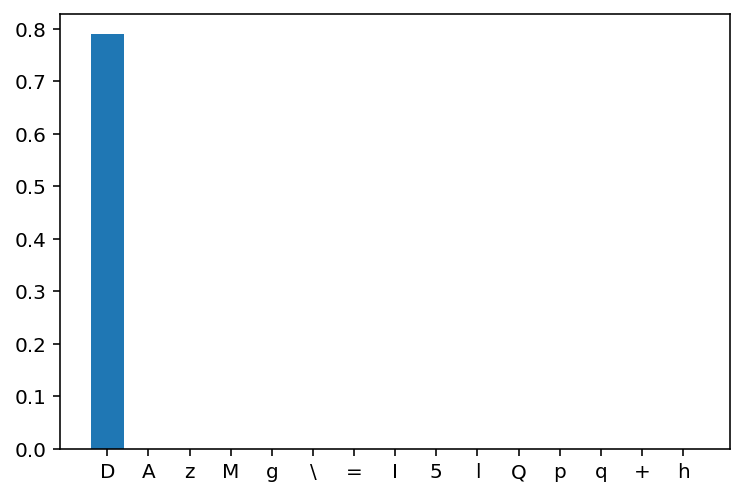

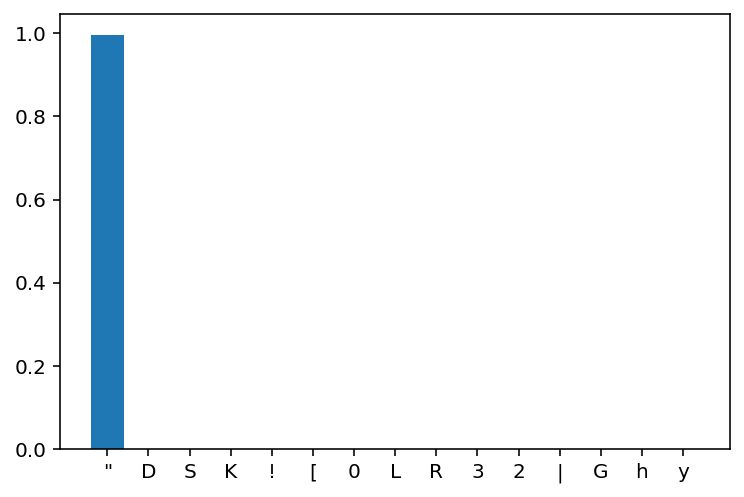

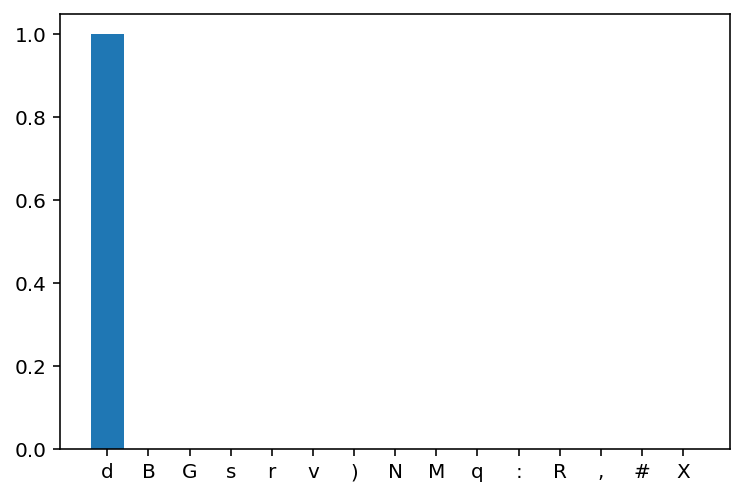

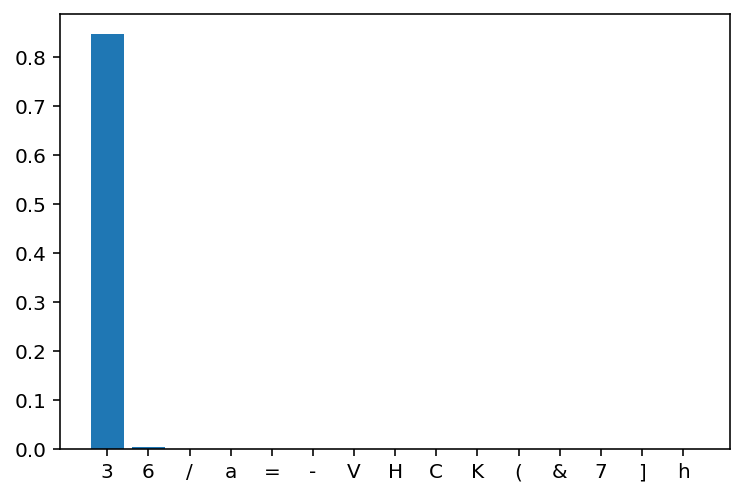

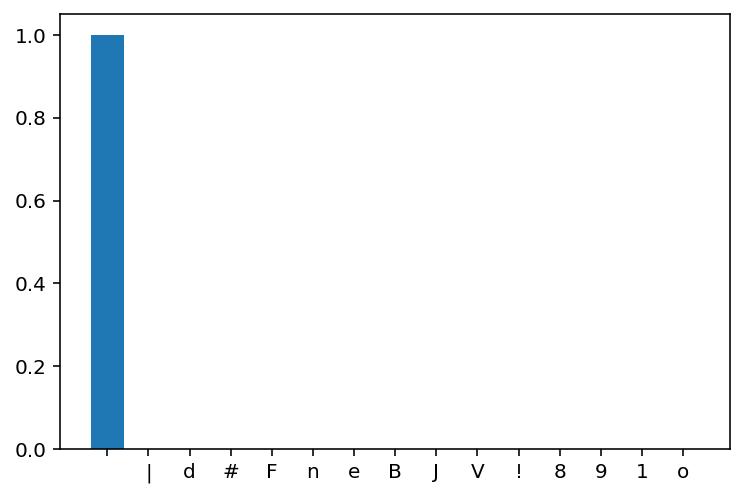

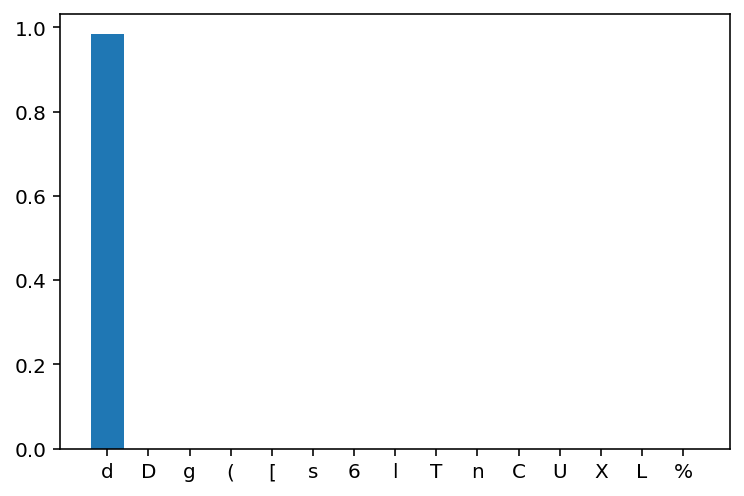

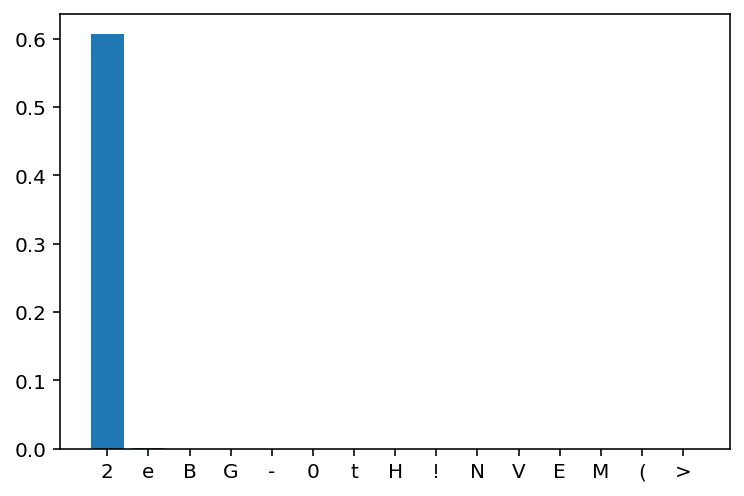

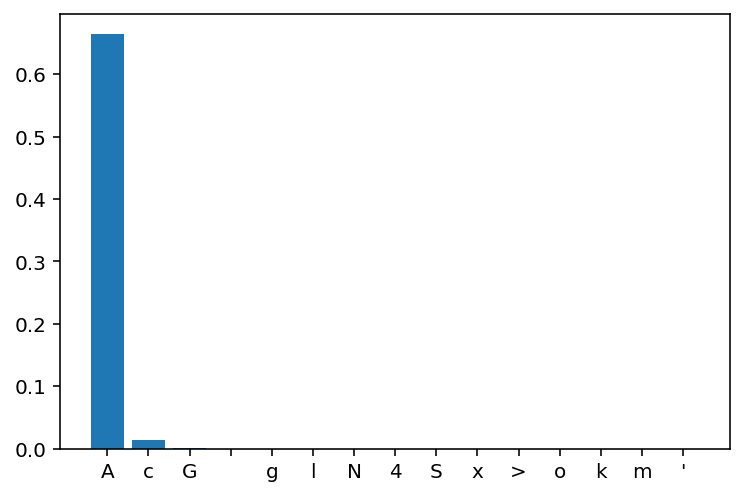

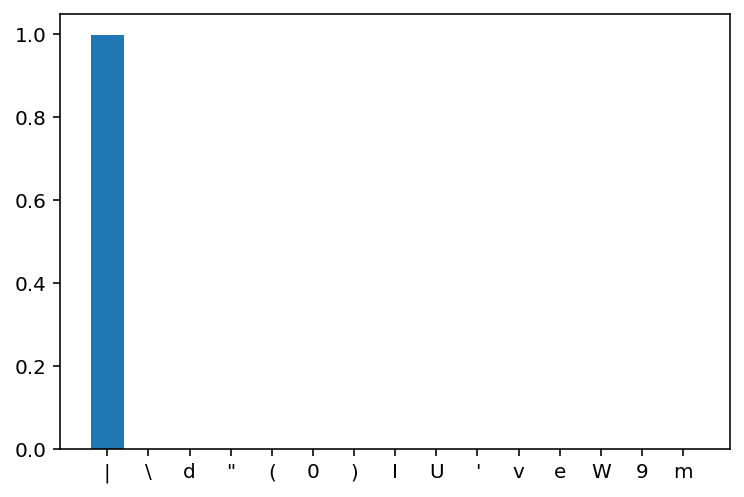

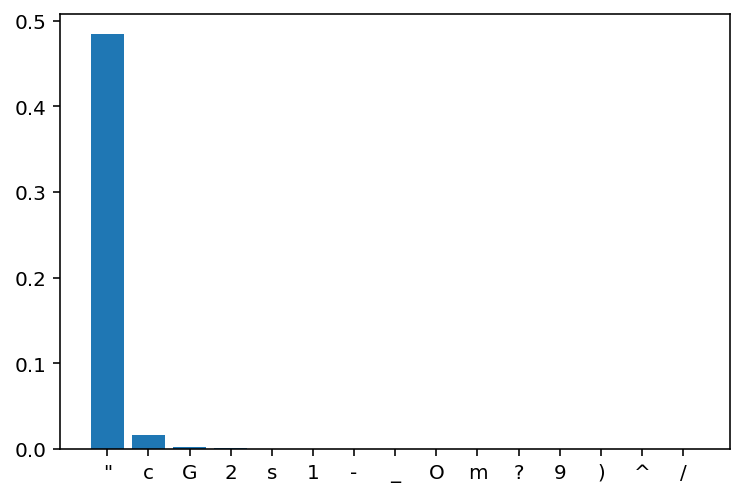

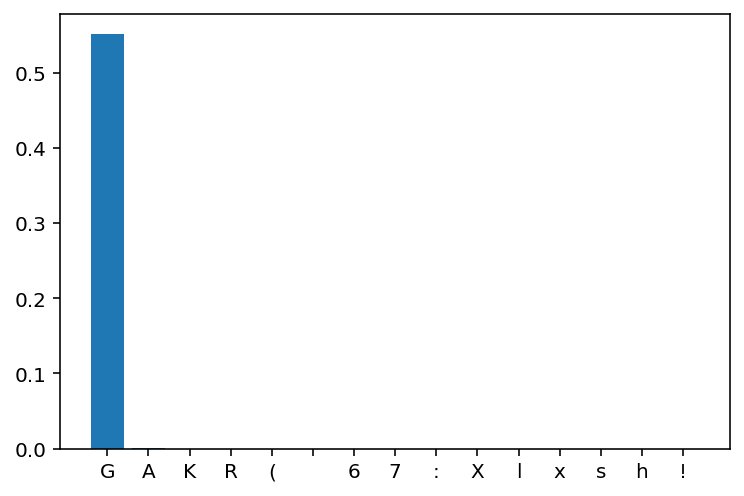

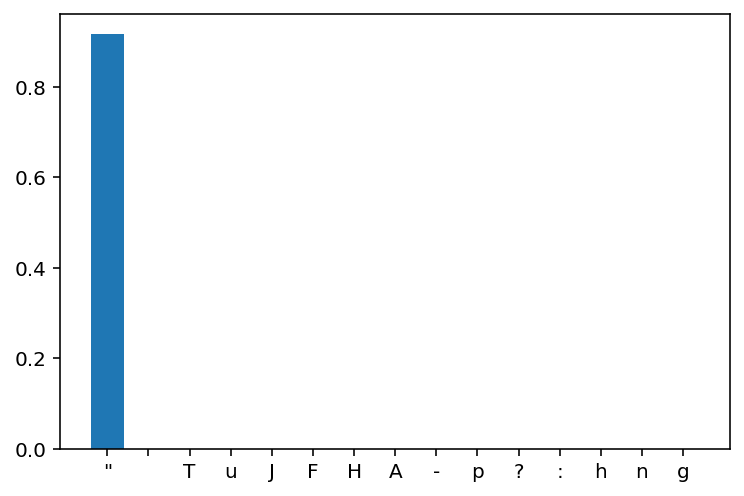

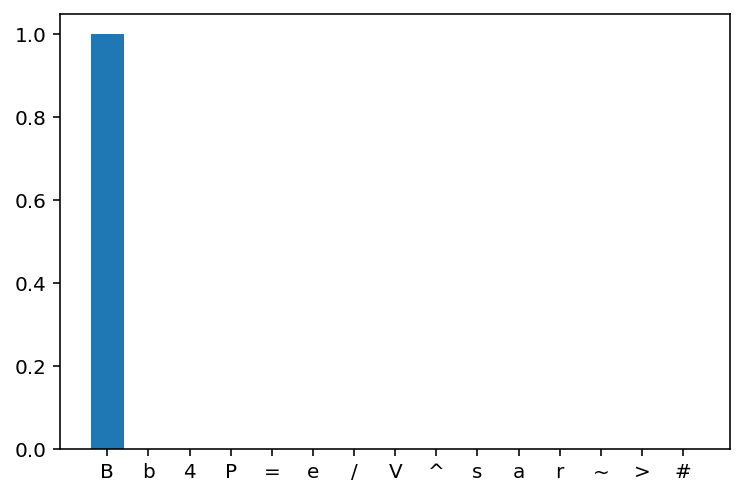

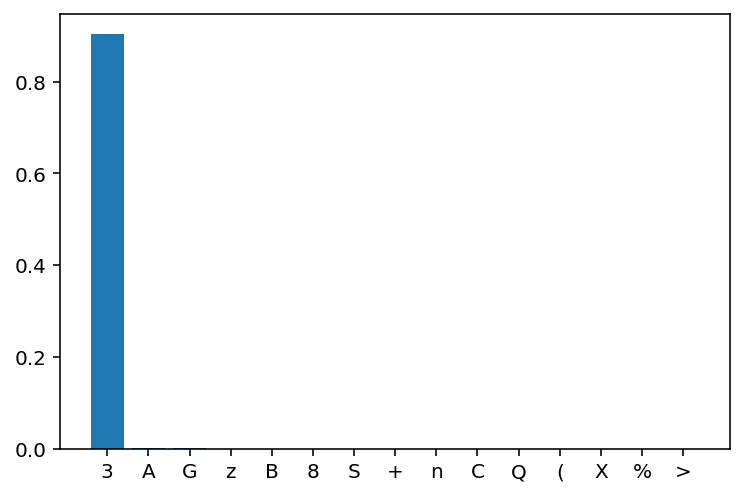

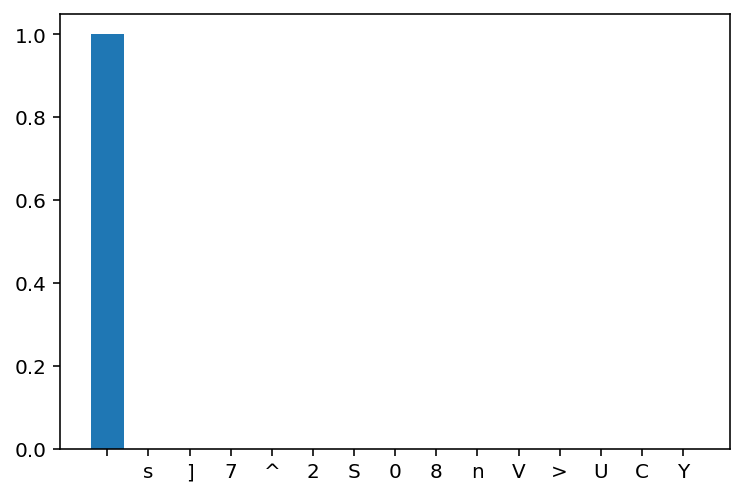

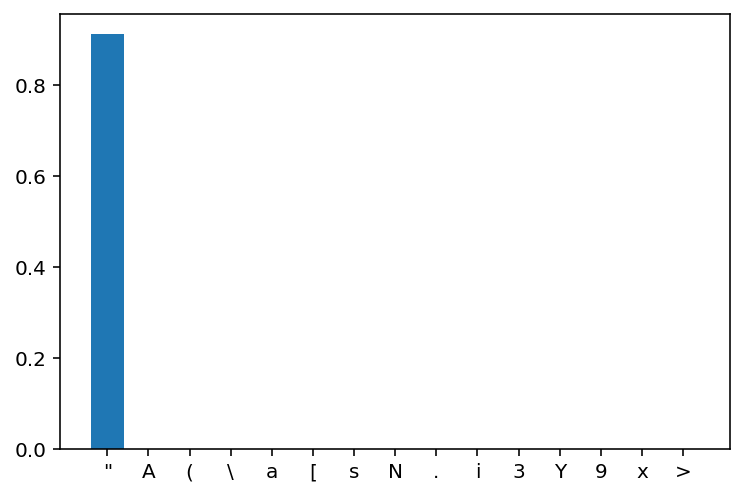

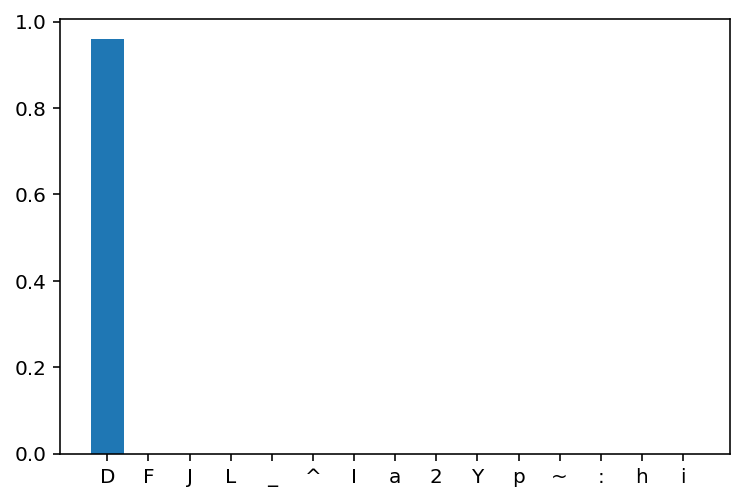

In [35]:
#plt.bar(x_axis_data[2], y_axis_data[2])

for i in range(len(x_axis_data)):
  plt.bar(x_axis_data[i], y_axis_data[i])
  plt.show()